<h3> Wine dataset </h3>

<p style = "font-size: 12px"> The "sklearn wine dataset" refers to a popular wine dataset that is included as part of the scikit-learn machine learning library. This dataset is often used for classification tasks and is a great starting point for learning and experimenting with machine learning algorithms.The sklearn wine dataset contains the results of a chemical analysis of wines, originating from three different cultivars in the same region of Italy. The analysis determined the quantities of 13 different constituents found in each wine, such as alcohol, malic acid, ash, and magnesium. The dataset includes a target variable indicating the cultivar (class) to which each wine belongs. </p>

1. Import libraries

In [28]:
import sklearn.datasets as datasets 
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import plotly.express as px 
from yellowbrick.classifier import ClassificationReport

2. Load Dataset 

In [29]:
dataset = datasets.load_wine()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [30]:
target_names = dataset.target_names[:]
fn = dataset.feature_names
fn.append('classes')

X = dataset.data
Y = dataset.target
Ynamed = np.array([target_names[i] for i in Y])

total_values = np.concatenate((X , Ynamed.reshape(178,1)), axis =1)

df = pd.DataFrame(total_values, columns = fn)
df.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
count,178,178,178,178,178,178,178,178,178,178,178,178,178,178
unique,126,133,79,63,53,97,132,39,101,132,78,122,121,3
top,12.37,1.73,2.28,20.0,88.0,2.2,2.65,0.26,1.35,4.6,1.04,2.87,520.0,class_1
freq,6,7,7,15,13,8,4,11,9,4,8,5,5,71


3. Make PCA values 

<p style="font-size: 12px"> Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. It allows you to transform high-dimensional data into a lower-dimensional space while preserving the most important patterns and relationships in the data. The main idea behind PCA is to find a new set of variables, called principal components, that are linear combinations of the original variables. These principal components are chosen in such a way that they capture the maximum amount of variance in the data. The first principal component accounts for the largest possible variance, the second principal component accounts for the second largest variance (orthogonal to the first), and so on. </p>

In [31]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)


fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['classes'],
    width= 600, height= 600,
    title=f'PCA for iris setosa dataset ',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

4. Divide to train / test split

In [32]:
Xtrain, Xtest, Ytrain , Ytest = train_test_split(X, Y, train_size=0.33)



5 . Test k-neighboors classifier

<p style="font-size: 12px"> The k-nearest neighbors (KNN) classifier is a supervised learning algorithm that can be used for both classification and regression tasks. It is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution. KNN is a simple yet powerful algorithm that can be effective in many scenarios. Here's how the KNN classifier works in theory: (1) Data Preparation: The KNN algorithm requires a labeled dataset for training. Each data point in the dataset consists of a set of features (independent variables) and a corresponding class label (dependent variable). (2) Distance Calculation: For a new unlabeled data point, the algorithm calculates its distance to all other labeled data points in the training set. The most common distance metric used is Euclidean distance, but other metrics like Manhattan distance or Minkowski distance can also be used. (3) Choosing k: The parameter k, known as the number of neighbors, needs to be defined. It determines how many nearest neighbors will be considered for classification. A larger k value smooths out the decision boundaries, while a smaller k value leads to more local decision-making. (4) Neighbor Selection: The k nearest neighbors to the new data point are selected based on their distances. These neighbors can be determined using a brute-force approach by calculating distances for all training samples, or using optimized data structures like kd-trees or ball trees for efficient neighbor search. (5) Majority Voting: Once the k nearest neighbors are identified, the class labels associated with those neighbors are examined. In classification tasks, the class label that appears most frequently among the neighbors is assigned to the new data point. For regression tasks, the algorithm computes the average or weighted average of the target values of the neighbors. (6) Prediction: After determining the majority class (or regression value), the KNN classifier assigns this class or value to the new data point. </p>

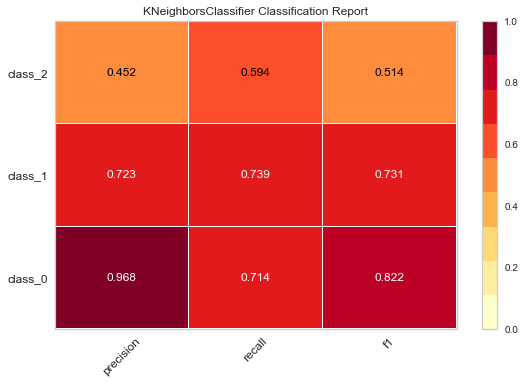

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [33]:
nearest = KNeighborsClassifier(n_neighbors= 20)

display = ClassificationReport(nearest, classes=target_names)
display.fit(Xtrain, Ytrain)
display.score(Xtest, Ytest)
display.show()



5 . Linear Discriminant Analysis 



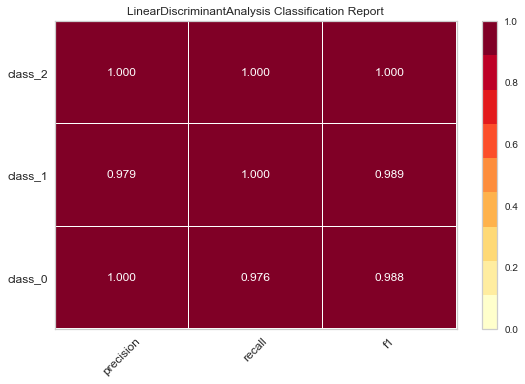

<AxesSubplot:title={'center':'LinearDiscriminantAnalysis Classification Report'}>

In [34]:
lda = LinearDiscriminantAnalysis()

display = ClassificationReport(lda, classes=target_names)
display.fit(Xtrain, Ytrain)
display.score(Xtest, Ytest)
display.show()